In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import sklearn
from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import r2_score, f1_score

%matplotlib inline

In [14]:
os.getcwd()

'/home/matan'

In [57]:
def load_dataset(file_name):
    return pd.read_csv(file_name)


In [58]:
try:
    df = load_dataset('sientinst_data_merged.csv')
except Exception as e:
    print ('\tError Message:', str(e))
    raise 

## Data cleansing
Some rows had more than 15 columns, which happend to be a mistake

In [59]:
def cleansing(df):
    len_before = len(df['Reads'])
    df.drop(df[df['Shanghai_ranking'].str.isnumeric() == False].index, inplace = True)
    df.drop(df[df['Publications'].str.isnumeric() == False].index, inplace = True)
    df.drop(df[df['Reads'].str.isnumeric() == False].index, inplace = True)
    df.drop(df[df['Citations'].str.isnumeric() == False].index, inplace = True)
    df.drop(df[df['Interest score'].str.isnumeric() == False].index, inplace = True)
    len_after = len(df['Reads'])
    print(str(len_before-len_after)+" rows were removed")
    df.to_csv('sientist_data_cleansing')

In [60]:
cleansing(df)
df

869 rows were removed


,Full name,Gender,Position,Nation,Institute,Shanghai_ranking,Depratment,Disciplines,Publications,Citations,Recommendations,Top cited research,Interest score,Reads,h index,URL
0,Thomas Serre,male,PhD,United States,Brown University,47,"Department of Cognitive, Linguistic and Psycho...",Machine Vision|Object Recognition|Machine Lear...,183,11905,64,HMDB51: A Large Video Database for Human Motio...,6087,33978,40,https://www.researchgate.net/profile/Thomas-Serre
1,Abdullah Chahin,male,MD,United States,Brown University,47,Division of Infectious Diseases,Sepsis|ICU|Intensive Care Medicine,62,234,5,False alarm reduction in critical care,1379,3586,9,https://www.researchgate.net/profile/Abdullah_...
2,Richard M Mariita,male,"BEd (Science), MSc (Microbiology) both from Ke...",United States,Brown University,47,Department of Chemistry,Microbiology|Genomics|PCR,39,286,55,Antitubercular and Phytochemical Investigation...,1959,4724,7,https://www.researchgate.net/profile/Richard_M...
3,Sharon Miriam Swartz,female,"Ph.D., The University of Chicago",United States,Brown University,47,Department of Ecology and Evolutionary Biology,Zoology|Biomechanics|Mammals,152,4510,45,The 'Law of Bone Transformation': A Case of Cr...,2329,37724,39,https://www.researchgate.net/profile/Sharon-Sw...
4,Roberto Zenit,male,Ph.D.,United States,Brown University,47,Brown School of Engineering,Numerical Simulation|Fluid Mechanics|Fluid Dyn...,235,3444,141,Particle-wall collisions in a viscous fluid,2294,48142,31,https://www.researchgate.net/profile/Roberto-Z...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29292,Yu Wang,male,PhD student,Chaina,Tsinghua-University,26,Department of Chemistry,Nanocrystals|Nano-Catalysis|Nanomaterials Synt...,42,7289,100,Core-Shell ZIF-8@ZIF-67 Derived CoP Nanopartic...,3704,17945,32,https://www.researchgate.net/profile/Yu-Wang-421
29293,Jiabin Wu,male,PhD,Chaina,Tsinghua-University,26,Department of Chemistry,Electrocatalysis|2D Materials|Nanomaterials,41,2300,70,Salt-Templated Synthesis of 2D Metallic MoN an...,1335,12644,21,https://www.researchgate.net/profile/Jiabin-Wu-3
29294,Li Liu,male,PhD,Chaina,Tsinghua-University,26,Department of Building Science and Technology,Ventilation|Cough|Respiratory,70,3132,162,Exhaled droplets due to talking and coughing,1922,28572,23,https://www.researchgate.net/profile/Li-Liu-20
29295,Libing Chu,male,Nan,Chaina,Tsinghua-University,26,Institute of Nuclear and New Energy Technology,Biofilms|Wastewater|Nitrogen,61,4120,38,Biological nitrate removal from water and wast...,2054,11537,32,https://www.researchgate.net/profile/Libing-Chu


In [61]:
def load_dataset(file_name, target_column):
    df = pd.read_csv(file_name)
    return df.drop([target_column], axis=1), df[target_column].copy()
    

In [62]:
file_name = 'sientist_data_cleansing'
target_col_name = 'h index'

try:
    X, y = load_dataset(file_name, target_col_name)
except Exception as e:
    print ('\tError Message:', str(e))
    raise 

In [63]:
y

0        40
1         9
2         7
3        39
4        31
         ..
28423    32
28424    21
28425    23
28426    32
28427    16
Name: h index, Length: 28428, dtype: int64

In [72]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28428 entries, 0 to 28427
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          28428 non-null  int64 
 1   Full name           28428 non-null  object
 2   Gender              28428 non-null  object
 3   Position            28428 non-null  object
 4   Nation              28428 non-null  object
 5   Institute           28428 non-null  object
 6   Shanghai_ranking    28428 non-null  int64 
 7   Depratment          28428 non-null  object
 8   Disciplines         28428 non-null  object
 9   Publications        28428 non-null  int64 
 10  Citations           28428 non-null  int64 
 11  Recommendations     28428 non-null  int64 
 12  Top cited research  28428 non-null  object
 13  Interest score      28428 non-null  int64 
 14  Reads               28428 non-null  int64 
 15  URL                 27219 non-null  object
dtypes: int64(7), object(9)

In [73]:
X.describe(include='all')

,Unnamed: 0,Full name,Gender,Position,Nation,Institute,Shanghai_ranking,Depratment,Disciplines,Publications,Citations,Recommendations,Top cited research,Interest score,Reads,URL
count,28428.000000,28428,28428,28428,28428,28428,28428.000000,28428,28428,28428.000000,28428.000000,28428.000000,28428,28428.000000,2.842800e+04,27219
unique,NaN,28188,3,4997,8,31,NaN,5018,21187,NaN,NaN,NaN,23857,NaN,NaN,27191
top,NaN,Tal Cohen,male,PhD,United States,Weizmann-Institute-of-Science,NaN,Department of Chemistry,Nan,NaN,NaN,NaN,Nan,NaN,NaN,t
freq,NaN,4,27519,6402,10927,1000,NaN,561,5556,NaN,NaN,NaN,3106,NaN,NaN,5
mean,14588.539187,NaN,NaN,NaN,NaN,NaN,177.988040,NaN,NaN,92.198677,3885.976572,49.050725,NaN,3559.091037,1.939902e+04,NaN
std,8547.354880,NaN,NaN,NaN,NaN,NaN,263.455342,NaN,NaN,135.100014,9541.473850,168.683852,NaN,4821.799740,5.865871e+04,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000e+00,NaN
25%,7162.750000,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,19.000000,171.750000,3.000000,NaN,1033.000000,2.034500e+03,NaN
50%,14302.500000,NaN,NaN,NaN,NaN,NaN,24.000000,NaN,NaN,50.000000,1041.500000,15.000000,NaN,2289.000000,7.479000e+03,NaN
75%,22155.250000,NaN,NaN,NaN,NaN,NaN,301.000000,NaN,NaN,110.000000,3544.000000,45.000000,NaN,4917.250000,1.965875e+04,NaN


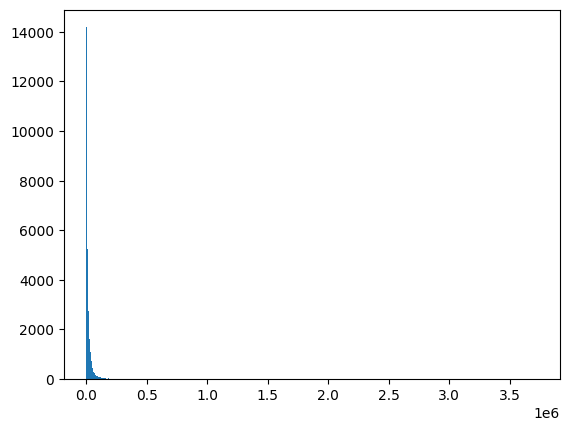

In [67]:
plt.hist(X.Reads, bins=500);